Approximation of 3 factor (Tensorflow)
Input 10 (3factor data) -> output 10 factor
It is expected that mininum inntermeditate nodes be only 3.
But it seems no.

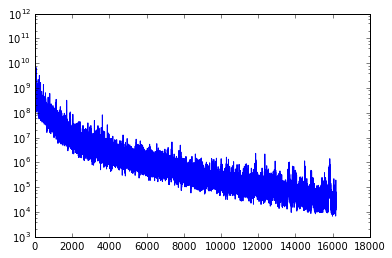

In [ ]:
import tensorflow as tf
import numpy as np
from IPython import display
from matplotlib import pyplot as plt
%matplotlib inline

factorNum = 3
dataDim = 10
resultDim = 10
node1Num = 32
node2Num = 16
node3Num = 8
node4Num =4
node5Num = 8
node6Num = 16
node7Num = 32

ftodConvertMat = np.random.randn(factorNum, dataDim)

def get_batch(dataNum):
    factorRandMatS = np.random.randn(dataNum, factorNum)
    factorRandMat = factorRandMatS*factorRandMatS
    dataRandMatS = factorRandMat.dot(ftodConvertMat)
    dataRandMat = dataRandMatS * dataRandMatS
    return dataRandMat,dataRandMat


def leaky_relu(x,alpha=0.2):
    return tf.maximum(alpha*x,x)

sess = tf.InteractiveSession() # sess=tf.InteractiveSession()    (not ipython)

x_ = tf.placeholder(tf.float32, shape=[None, dataDim]) # input
t_ = tf.placeholder(tf.float32, shape=[None, resultDim]) # output

W1 = tf.Variable(tf.random_normal([dataDim,node1Num]))
b1  = tf.Variable(tf.zeros([node1Num]))

W2 =  tf.Variable(tf.random_normal([node1Num,node2Num]))
b2  = tf.Variable(tf.zeros([node2Num]))

W3 =  tf.Variable(tf.random_normal([node2Num,node3Num]))
b3  = tf.Variable(tf.zeros([node3Num]))
W4 =  tf.Variable(tf.random_normal([node3Num,node4Num]))
b4  = tf.Variable(tf.zeros([node4Num]))

W5 =  tf.Variable(tf.random_normal([node4Num,node5Num]))
b5  = tf.Variable(tf.zeros([node5Num]))
W6 =  tf.Variable(tf.random_normal([node5Num,node6Num]))
b6  = tf.Variable(tf.zeros([node6Num]))
W7 =  tf.Variable(tf.random_normal([node6Num,node7Num]))
b7  = tf.Variable(tf.zeros([node7Num]))


W8 =  tf.Variable(tf.random_normal([node7Num,resultDim]))
b8  =  tf.Variable(tf.zeros([resultDim]))

sess.run(tf.initialize_all_variables())

h1 = leaky_relu(tf.matmul(x_,W1)+b1)
h2 = leaky_relu(tf.matmul(h1,W2)+b2)
h3 = leaky_relu(tf.matmul(h2,W3)+b3)
h4 = leaky_relu(tf.matmul(h3,W4)+b4)
h5 = leaky_relu(tf.matmul(h4,W5)+b5)
h6 = leaky_relu(tf.matmul(h5,W6)+b6)
h7 = leaky_relu(tf.matmul(h6,W7)+b7)
y   = leaky_relu(tf.matmul(h7,W8)+b8)
e   =tf.nn.l2_loss(y-t_)
tf.scalar_summary("diffl2", e)

train_step = tf.train.AdamOptimizer().minimize(e)

losses =[]
sess.run(tf.initialize_all_variables())

saver = tf.train.Saver()

summary_op = tf.merge_all_summaries()
summary_writer = tf.train.SummaryWriter("/tmp/MultifactorQuad.tflog",
                                        graph_def=sess.graph_def)

batch_size=100
for i in range(200000):
    x,t = get_batch(batch_size)

    x = x.astype(np.float32).reshape(batch_size,dataDim)
    t = t.astype(np.float32).reshape(batch_size,dataDim)
    feed_dict={x_: x, t_:t}
    loss= e.eval(feed_dict=feed_dict)
    losses.append(loss)
    train_step.run(feed_dict=feed_dict)
    if i%100==99:
        plt.hold(False)
        plt.plot(losses,"b")
        plt.yscale('log')
        display.display(plt.gcf()) 
        display.clear_output(wait=True)
        summary_str = sess.run(summary_op, feed_dict=feed_dict)
        summary_writer.add_summary(summary_str, i)
    if i%10000==9999:
        saver.save(sess, "multi.ckpt")
